## **Librerías**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
pd.options.display.max_columns = False

In [85]:
from scipy.stats import pearsonr

## **Datos**

In [8]:
df = pd.read_csv('./Data/train.csv')

In [181]:
def exploracion_metadatos(df, y):
    # Obtenemos nuestras variables y sus tipos
    meta = pd.DataFrame(df.dtypes).reset_index()
    meta.columns = ['Variable', 'Tip']    

    # Calculamos algunos metadatos de nuestra data
    meta['Observaciones'] = meta['Variable'].apply(lambda x: df[x].count())
    meta['Valores_Unicos'] = meta['Variable'].apply(lambda x: len(df[x].unique()))
    meta['Valores_Nulos'] = meta['Variable'].apply(lambda x: df[x].isnull().sum())
    meta['%_Valores_Nulos'] = round(meta['Valores_Nulos']/df.shape[0]*100, 2)
    
    # Calculamos algunos valores adicionales
    
    # Kurtosis
    kurtosis = pd.DataFrame(df.kurt(numeric_only=True)).reset_index()
    kurtosis.columns = ['Variable', 'Kurtosis']
    
    # Inclinación
    skewness = pd.DataFrame(df.skew(numeric_only=True)).reset_index()
    skewness.columns = ['Variable', 'Skewness']
    
    # Correlación
    corr = df.corr().reset_index()[['index', y]]
    corr.columns = ['Variable', 'Correlacion']
    corr['Correlacion'] = corr['Correlacion'].apply(lambda x: abs(x))
    
    meta = pd.merge(meta, kurtosis, how='left')
    meta = pd.merge(meta, skewness, how='left')
    meta = pd.merge(meta, corr, how='left')

    return meta

In [182]:
meta = exploracion_metadatos(df, 'SalePrice')
meta.tail(3)

,Variable,Tip,Observaciones,Valores_Unicos,Valores_Nulos,%_Valores_Nulos,Kurtosis,Skewness,Correlacion
78,SaleType,object,1460,9,0,0.0,NaN,NaN,NaN
79,SaleCondition,object,1460,6,0,0.0,NaN,NaN,NaN
80,SalePrice,int64,1460,663,0,0.0,6.536282,1.882876,1.0


In [184]:
meta[~meta['Correlacion'].isna()].sort_values('Correlacion', ascending = False)

,Variable,Tip,Observaciones,Valores_Unicos,Valores_Nulos,%_Valores_Nulos,Kurtosis,Skewness,Correlacion
80,SalePrice,int64,1460,663,0,0.00,6.536282,1.882876,1.000000
17,OverallQual,int64,1460,10,0,0.00,0.096293,0.216944,0.790982
46,GrLivArea,int64,1460,861,0,0.00,4.895121,1.366560,0.708624
61,GarageCars,int64,1460,5,0,0.00,0.220998,-0.342549,0.640409
62,GarageArea,int64,1460,441,0,0.00,0.917067,0.179981,0.623431
38,TotalBsmtSF,int64,1460,721,0,0.00,13.250483,1.524255,0.613581
43,1stFlrSF,int64,1460,753,0,0.00,5.745841,1.376757,0.605852
49,FullBath,int64,1460,4,0,0.00,-0.857043,0.036562,0.560664
54,TotRmsAbvGrd,int64,1460,12,0,0.00,0.880762,0.676341,0.533723
19,YearBuilt,int64,1460,112,0,0.00,-0.439552,-0.613461,0.522897


<AxesSubplot:>

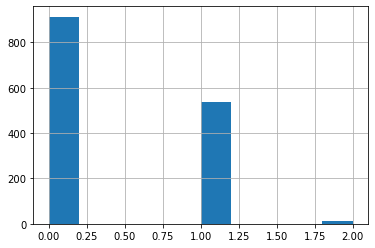

In [170]:
df['HalfBath'].hist()

In [171]:
df[['HalfBath']].describe()

,HalfBath
count,1460.000000
mean,0.382877
std,0.502885
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,2.000000
